# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

### Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')

display(data.head())
display(data.info())
display(data.describe())
display(data.isna().sum())

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Year_of_Release      NA_sales      EU_sales      JP_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        Other_sales  Critic_Score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

# Вывод

Видим достаточно большое количество пропусков, которые в последующим мы обработаем. Также стоит привести названия столцов к "змеиному стилю" и поменять формат данных в стольце year of release на int, тк это целочисленное значение, а в столбце user score на float, тк это дробное значение

### Шаг 2. Предобработка

In [3]:
data.columns = data.columns.str.lower() #Приводим столбцы к нижнему регистру
display(data.columns.unique())

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
data = data.dropna(subset = ['year_of_release']) #удаляем пропуски, тк потреям от этого очень мало даннных
data['year_of_release'] = data['year_of_release'].astype('int64') #и меняем формат данных на int, тк год - целочисленное значение
data = data.dropna(subset=['name'])
data = data.dropna(subset=['genre'])#удаляем строки с пропусками в name и genre, тк тут всего 2 пропуска и это ни на что не повлияет

In [5]:
display(data['user_score'].unique())
data['user_score'].value_counts()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.9       2
0.5       2
0.2       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

Обнаруживаем tbd, котрое означает - «to be determined» (будет определено). Это означет, что значение рейтинга еще не определено, так что предлагаю заменить аббревиатуру tbd на Nan

In [6]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN) #заменям tbd на nan
data.isna().sum()
data['user_score'] = data['user_score'].astype('float64') #и меняем формат данных на float

In [7]:
display(data['critic_score'].unique())
data['critic_score'] = data['critic_score'].astype('Int64')#меням формат данных на int, тк в данном столбце указывается рейтинг от 1 до 100

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [8]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [10]:
data['total_sales'] = data.loc[:,['na_sales','eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [12]:
display(data.info())
display(data.isna().sum())
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   Int64  
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


None

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
total_sales           0
dtype: int64

0

In [13]:
data[data.duplicated(['name', 'platform', 'year_of_release'])]

name platform  year_of_release   genre  na_sales  eu_sales  \
16230  Madden NFL 13      PS3             2012  Sports       0.0      0.01   

       jp_sales  other_sales  critic_score  user_score rating  total_sales  
16230       0.0          0.0            83         5.5      E         0.01

In [14]:
data.loc[
    ((data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012))
]

name platform  year_of_release   genre  na_sales  eu_sales  \
604    Madden NFL 13      PS3             2012  Sports      2.11      0.22   
16230  Madden NFL 13      PS3             2012  Sports      0.00      0.01   

       jp_sales  other_sales  critic_score  user_score rating  total_sales  
604         0.0         0.23            83         5.5      E         2.56  
16230       0.0         0.00            83         5.5      E         0.01

 Нашли дублирующую строчку, удаляем именно 16230, тк в ней практически не содержится данных, что не скажешь о строке 604

In [13]:
data = data[data.index != 16230]

In [14]:
data.loc[
    ((data['name'] == 'Madden NFL 13') & 
    (data['platform'] == 'PS3') & 
    (data['year_of_release'] == 2012))
]

name platform  year_of_release   genre  na_sales  eu_sales  \
604  Madden NFL 13      PS3             2012  Sports      2.11      0.22   

     jp_sales  other_sales  critic_score  user_score rating  total_sales  
604       0.0         0.23            83         5.5      E         2.56

В столбцах различного вида рейтинга пропуски заменить просто так не получится, тк не прослеживается никакая взаимосвзять между этими показателями и, например, названием или годом выпуска. 

Строчки, в которых были пропуски, помимо пропусков в различных видах отзывов и рейтинге, мы удалили, тк потеряли от этого очень малое количество данных. Пропуски в столбцах с оценками и рейтингом мы трогать не стали, тк удалив эти строчки, мы потеряем много данных, заполнив их 0 мы исказим результаты последующего анализа, а заполнить условными медианными значениями мы не можем, тк отсутсвует какая-либо взаимосвязть между названием игры, годом выпуска или другими показателями, доступными в таблице

Заменяем устаревший рейтинг

In [15]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'
data["rating"] = data['rating'].fillna("undefined")
data['rating'].unique()

array(['E', 'undefined', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Вывод:
- Привели к правильному типу данных столбцы year_of_release, critic_score и user_score
- Обработали пропуски там, где это возможно. В столбце жанра и названия игры было обнаружено 2 пропуска и мы удалили строчки, в которых содержались эти пропуски.
- Привели названия столбцо к "змеиному стилю" 
- Дубликатов не обнаружено
- Посчитали сумарные продажи во всех регионах


### Шаг 3. Исследовательский анализ


#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

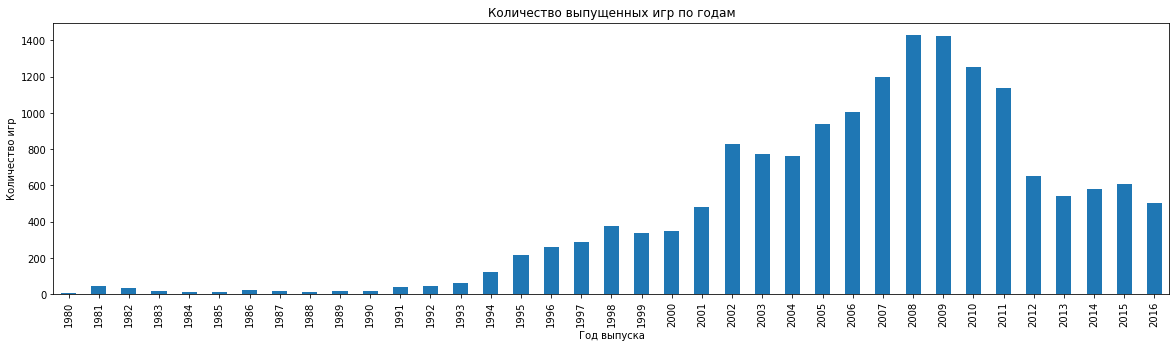

In [16]:
(data.groupby('year_of_release')['name'].count()
    .plot(kind = 'bar', 
    ylabel = 'Количество игр',
    title = 'Количество выпущенных игр по годам',
    figsize = (20, 5)))
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

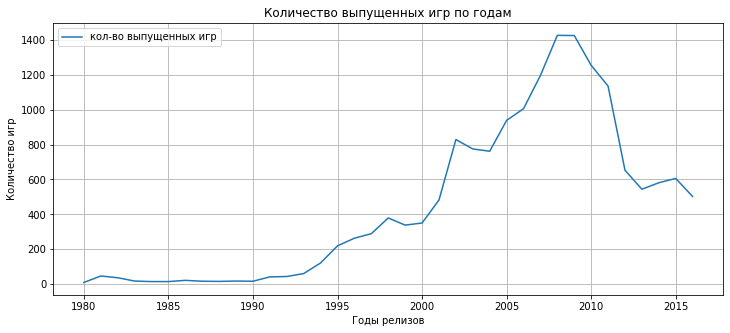

In [17]:
data.pivot_table(
    index = 'year_of_release', 
    values = 'name', 
    aggfunc = ('count')
).rename(columns = {'name' : 'кол-во выпущенных игр'}
).plot(
    grid = True,
    xlabel = 'Годы релизов',
    ylabel = 'Количество игр',
    title = 'Количество выпущенных игр по годам',
    figsize = (12,5)
);


Видим рост выпуска игр с 1980 по 2008 год, а затем резкое снижение. Самое большое количество игр было выпщуено в 2008-2009 года. Думаю, наиболее актуальным периодом для исселодования можно считать года, начиная с 2014, но для продаж по платформам я буду использовать 2000 год, чтобы узнать время жизни 1 платформы.


#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

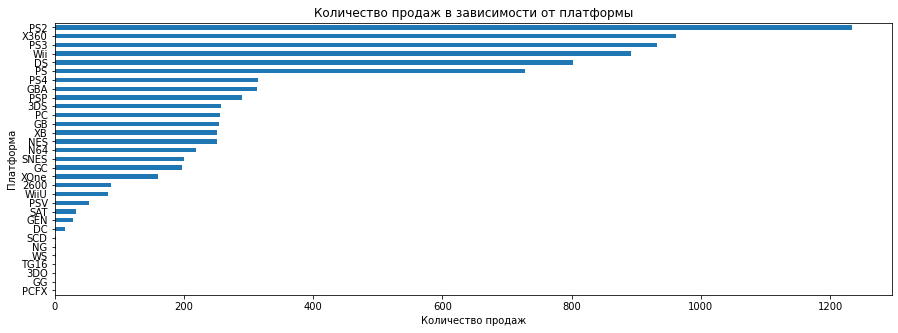

In [20]:
data.groupby('platform')['total_sales'].sum().sort_values()\
    .plot(kind = 'barh',
         ylabel = 'Платформа',
         title = 'Количество продаж в зависимости от платформы',
         figsize = (15, 5))
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

Из графика видим, что самыми популярными платформами были PS2, X360, PS3 и Wii

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [20]:
top_platforms = data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(10)
top_platforms = top_platforms.reset_index().rename_axis(None, axis=1)
top_platforms
#создали сводную таблицу, в которую вынесли 10 платформ с самыми выскоими продажми

platform  total_sales
0      PS2      1233.56
1     X360       961.24
2      PS3       931.34
3      Wii       891.18
4       DS       802.78
5       PS       727.58
6      PS4       314.14
7      GBA       312.88
8      PSP       289.53
9      3DS       257.81

In [21]:
def func(name):
    arg1 = data[(data['platform'] == name) & (data['year_of_release'] > 1999)]
    for_func = arg1.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
    return for_func #функция создания сводной таблицы для каждой платформы с годом выпуска от 2000

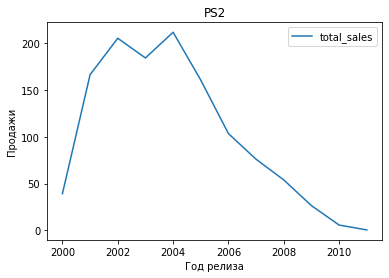

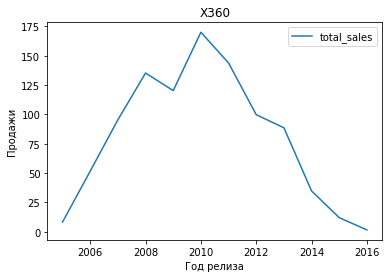

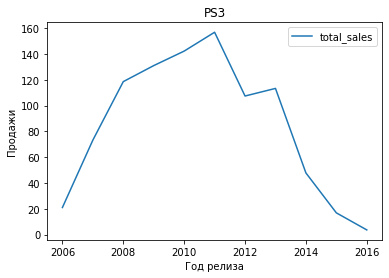

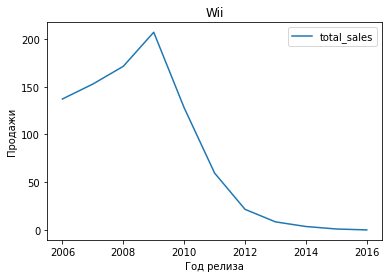

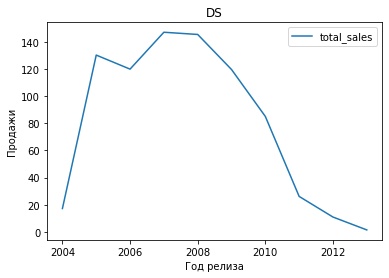

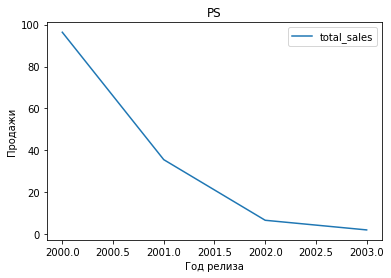

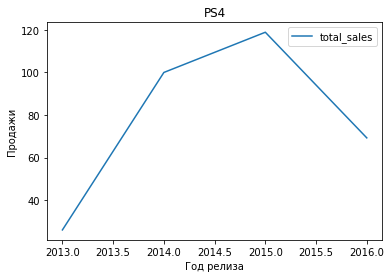

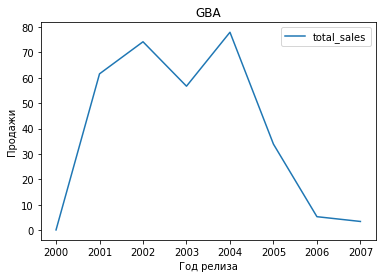

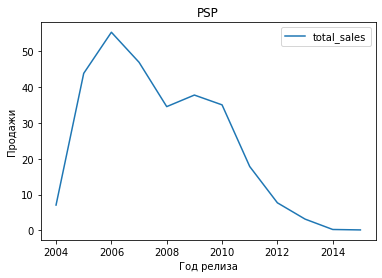

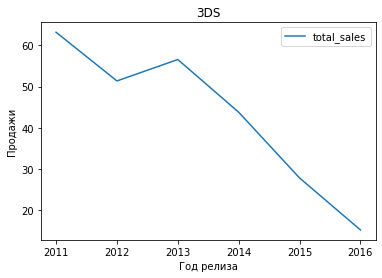

In [40]:
for p in list(top_platforms['platform']):
    func(p).plot(title = p, xlabel = 'Год релиза', ylabel = 'Продажи')
    plt.show()

Из графиков видим, что почти все платформы существуют 7 лет. Самые продаваемые из них это PS2, Xbox360 и PS3. При этом все платформы идут на снижение по продажам. При этом самые антитрендовые платформы это ps2 и xbox360, тк они снижаются к нулю продаж за всего 6 лет. Потенциально прибыльной платформой я бы назвал ps4,тк с момента ее выпуска прошло не так много времени и продажи еще не упали до 0

In [41]:
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [42]:
actual_df = data.loc[data['year_of_release'] >= 2014]#актуальный период

# Потенциально прибыльные платформы

In [43]:
actual_platform = actual_df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False).head(10)
actual_platform = actual_platform.reset_index().rename_axis(None, axis=1)
actual_platform

platform  total_sales
0      PS4       288.15
1     XOne       140.36
2      3DS        86.68
3      PS3        68.18
4     X360        48.22
5     WiiU        42.98
6       PC        27.05
7      PSV        22.40
8      Wii         5.07
9      PSP         0.36

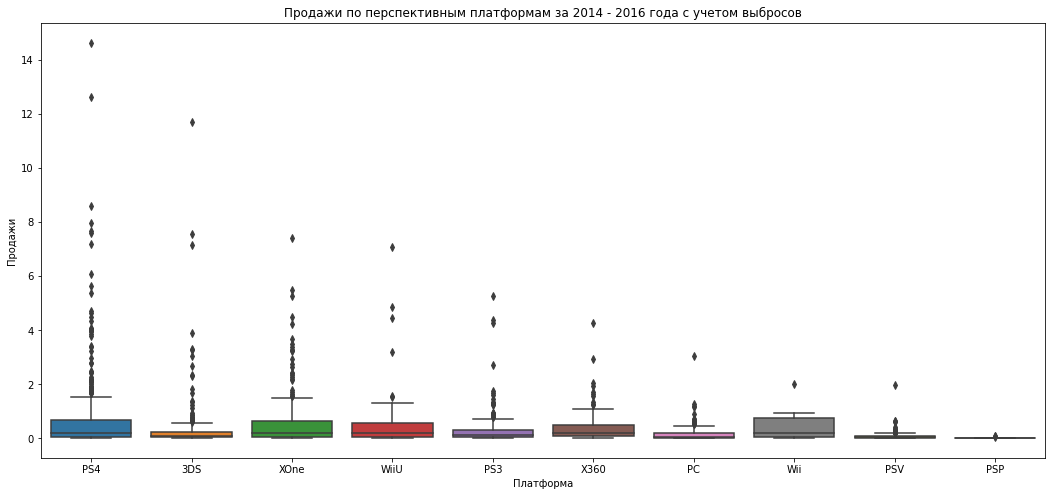

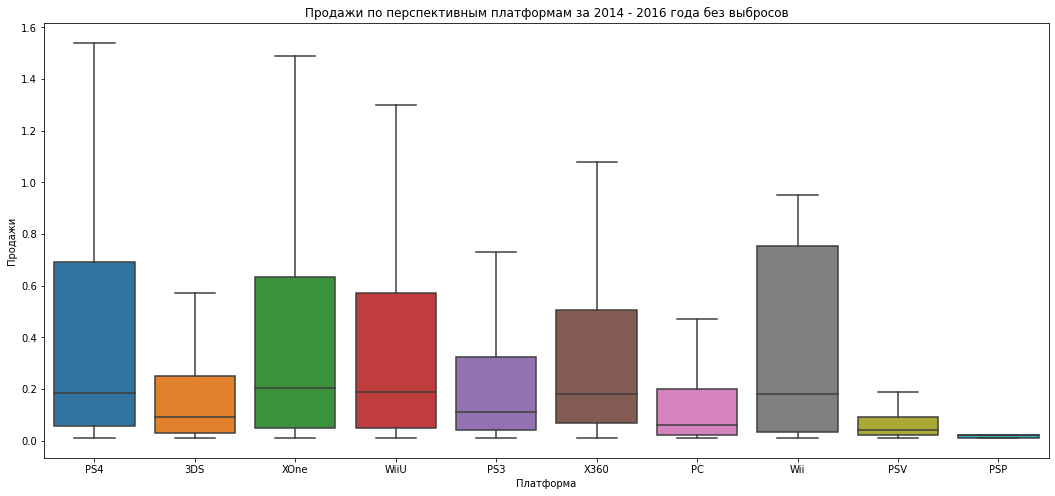

In [44]:
plt.figure(figsize=(18,8))
sns.boxplot(data=actual_df, x='platform', y='total_sales')
plt.title('Продажи по перспективным платформам за 2014 - 2016 года с учетом выбросов')
plt.xlabel('Платформа')
plt.ylabel('Продажи');

plt.figure(figsize=(18,8))
sns.boxplot(data=actual_df, x='platform', y='total_sales', showfliers = False)
plt.title('Продажи по перспективным платформам за 2014 - 2016 года без выбросов')
plt.xlabel('Платформа')
plt.ylabel('Продажи');


# вывод по потенциально прибыльным платформам
Потенциально прибыльными платформами я бы назвал PS4 и XOne, тк они появились совсем недавно и они находятся лишь в середине медианного времени существования платформ, а значит в 2017 году они продолжат существовать и оставаться в лидерах по продажам, так же есть вероятность, что продолжит свое существование и 3DS, тк вышла она не так давно и занимает 3 место в списке лидеров по платформам

Сильно упали в продажах PSP, Wii и PSC

# Вывод
- Исходя из ящиков с усами видно, что медиана у всех платформ на разном уровне
- Наибольшее число продаж у XOne, ps3, ps4 и 3DS

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы. 
##### Для рассмотрения возьмем PS4

In [45]:
ps4 = actual_df[actual_df['platform']=='PS4']
print('Корреляция между продажами и оценками')
actual_df[actual_df.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr() #корелляция между оценкой пользователей/критиков и продажами во всех регионах


Корреляция между продажами и оценками


total_sales  critic_score  user_score
total_sales      1.000000      0.402661   -0.040132
critic_score     0.402661      1.000000    0.546434
user_score      -0.040132      0.546434    1.000000

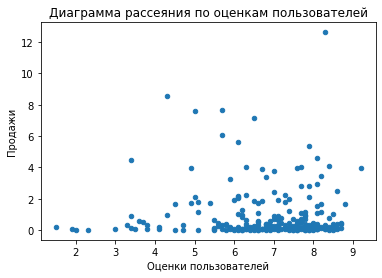

In [46]:
ps4.plot(
    kind = 'scatter',
    x = 'user_score',
    y = 'total_sales', 
    title = 'Диаграмма рассеяния по оценкам пользователей', 
    xlabel = "Оценки пользователей",
    ylabel = "Продажи",
);# строим диаграмму рассеяния по оценкам пользователей

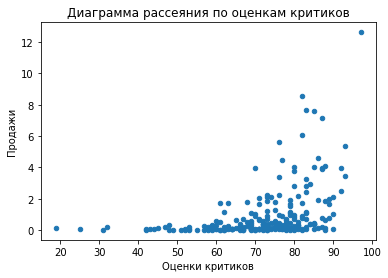

In [47]:
ps4.plot(
    kind = 'scatter',
    x = 'critic_score',
    y = 'total_sales', 
    title = 'Диаграмма рассеяния по оценкам критиков', 
    xlabel = "Оценки критиков",
    ylabel = "Продажи",
);# строим диаграмму рассеяния по оценкам критиков

# Вывод

В целом можно сказать, что зависимость между продажами и оценками пользователей достаточно низкая, однако оценки пользователей могут сказываться на продажах. Чем выше оценка критиков, тем выше уровень продаж.

#### Соотнесите выводы с продажами игр на других платформах.

In [48]:
def scatter_matrix(p): 
    platform = actual_df[actual_df['platform'] == p]
    platform.plot(
    kind = 'scatter',
    x = 'critic_score',
    y = 'total_sales', 
    title = p, 
    xlabel = "Оценки критиков",
    ylabel = "Продажи")
plt.show;

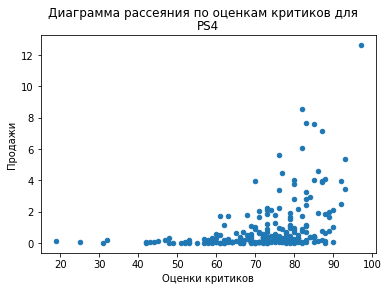

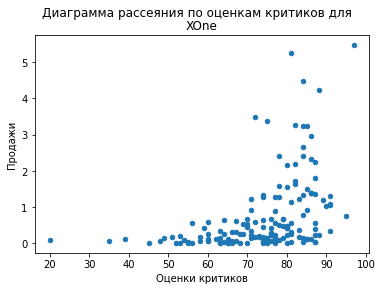

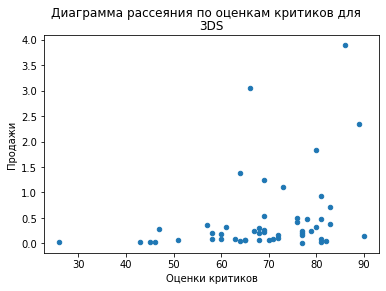

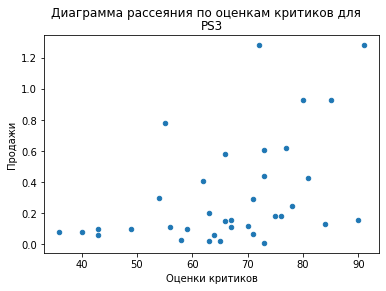

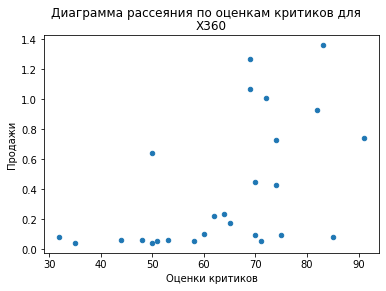

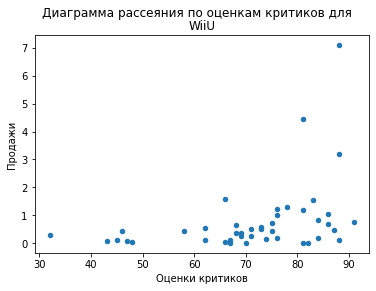

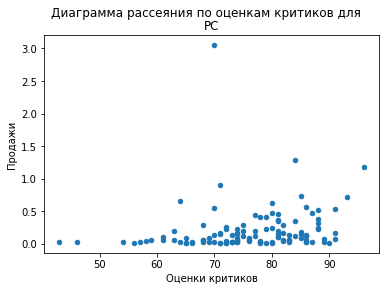

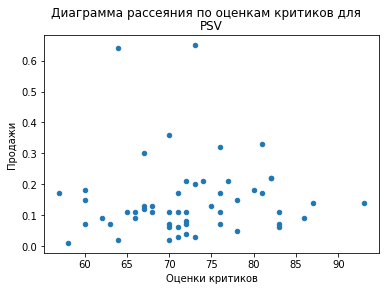

In [49]:
for i in list(actual_platform['platform'].head(8)):
    scatter_matrix(i)
    plt.title(i)
    plt.suptitle('Диаграмма рассеяния по оценкам критиков для')


In [50]:
def scatter_matrix1(p): #та же функция но для оценок пользователей
    platform = actual_df[actual_df['platform'] == p]
    platform.plot(
    kind = 'scatter',
    x = 'user_score',
    y = 'total_sales', 
    title = p, 
    xlabel = "Оценки пользователей",
    ylabel = "Продажи"),
    plt.show;


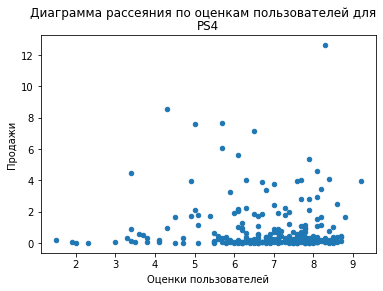

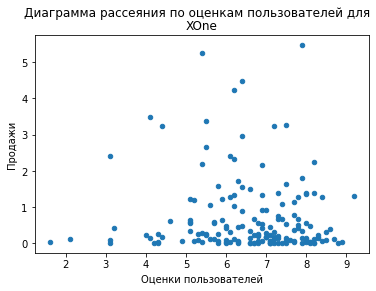

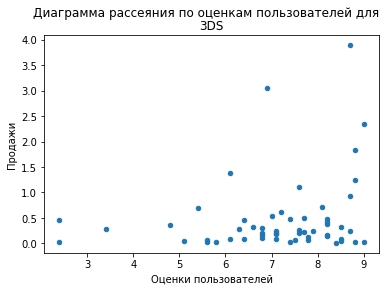

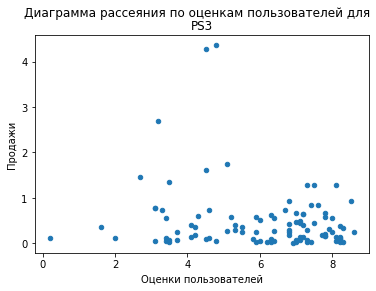

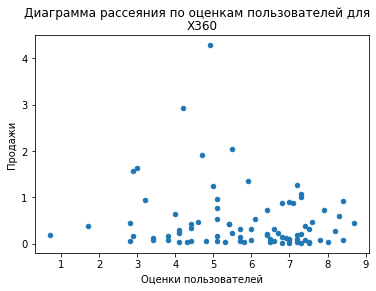

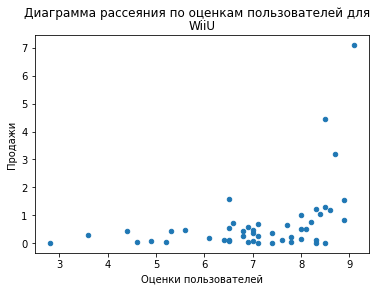

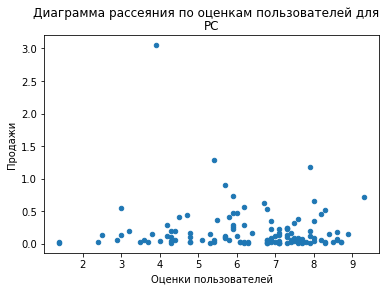

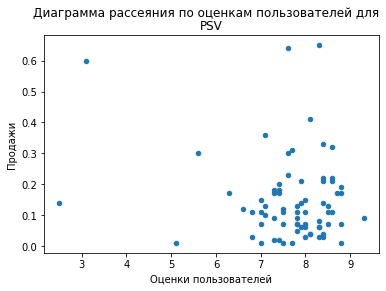

In [36]:
for l in list(actual_platform['platform'].head(8)):
    scatter_matrix1(l)
    plt.title(l)
    plt.suptitle('Диаграмма рассеяния по оценкам пользователей для')


In [37]:
for p in list(actual_platform['platform'].head(8)):
    print('Матрица корреляций для ', p)
    display(actual_df[actual_df.platform == p][['total_sales', 'critic_score', 'user_score']].corr())

Матрица корреляций для  PS4


total_sales  critic_score  user_score
total_sales      1.000000      0.402661   -0.040132
critic_score     0.402661      1.000000    0.546434
user_score      -0.040132      0.546434    1.000000

Матрица корреляций для  XOne


total_sales  critic_score  user_score
total_sales      1.000000      0.428677   -0.070384
critic_score     0.428677      1.000000    0.440977
user_score      -0.070384      0.440977    1.000000

Матрица корреляций для  3DS


total_sales  critic_score  user_score
total_sales      1.000000      0.314117    0.215193
critic_score     0.314117      1.000000    0.862485
user_score       0.215193      0.862485    1.000000

Матрица корреляций для  PS3


total_sales  critic_score  user_score
total_sales      1.000000      0.446575   -0.166761
critic_score     0.446575      1.000000    0.693445
user_score      -0.166761      0.693445    1.000000

Матрица корреляций для  X360


total_sales  critic_score  user_score
total_sales      1.000000      0.525723   -0.138445
critic_score     0.525723      1.000000    0.625309
user_score      -0.138445      0.625309    1.000000

Матрица корреляций для  WiiU


total_sales  critic_score  user_score
total_sales      1.000000      0.370201    0.407926
critic_score     0.370201      1.000000    0.763536
user_score       0.407926      0.763536    1.000000

Матрица корреляций для  PC


total_sales  critic_score  user_score
total_sales      1.000000      0.174634   -0.071597
critic_score     0.174634      1.000000    0.466099
user_score      -0.071597      0.466099    1.000000

Матрица корреляций для  PSV


total_sales  critic_score  user_score
total_sales      1.000000      0.042665   -0.168455
critic_score     0.042665      1.000000    0.524066
user_score      -0.168455      0.524066    1.000000

# Вывод

Практически у всех рассмотренных (кроме PSV) плафторм присутствует корреляция между продажами и оценками критиков. Зависимости между продажами и оценками пользователей практически не прослеживается(кроме Wii). Можно сказать, что для того чтобы игра стала успешной, необходимо распологать высокими оценками критиков на конерктной платформе

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [51]:
top_genres = actual_df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(by = 'total_sales', ascending = False)
top_genres = top_genres.reset_index().rename_axis(None, axis=1)
top_genres

genre  total_sales
0         Action       199.36
1        Shooter       170.94
2         Sports       109.48
3   Role-Playing       101.44
4           Misc        37.55
5       Fighting        28.22
6         Racing        27.52
7       Platform        18.09
8      Adventure        17.55
9     Simulation        13.13
10      Strategy         3.96
11        Puzzle         2.21

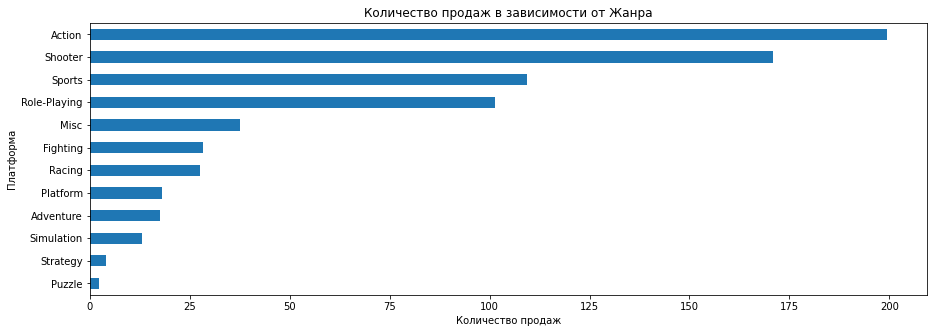

In [52]:
top_genres.groupby('genre')['total_sales'].sum().sort_values()\
    .plot(kind = 'barh',
         ylabel = 'Жанр',
         title = 'Количество продаж в зависимости от Жанра',
         figsize = (15, 5))
plt.xlabel('Количество продаж')
plt.ylabel('Платформа')
plt.show()

In [53]:
actual_df.pivot_table(
    index='genre',
    values='total_sales',
    aggfunc=('sum', 'median', 'count')
).rename(columns={
    'sum':'Продажи, млн',
    'median':'Медиана продаж',
    'count':'Количество выпущенных игр'
}).sort_values(by='Медиана продаж', ascending=False)

Количество выпущенных игр  Медиана продаж  Продажи, млн
genre                                                                
Shooter                             128           0.515        170.94
Sports                              161           0.180        109.48
Platform                             38           0.140         18.09
Fighting                             60           0.125         28.22
Role-Playing                        221           0.110        101.44
Simulation                           44           0.100         13.13
Action                              619           0.090        199.36
Misc                                113           0.090         37.55
Racing                               69           0.090         27.52
Strategy                             37           0.060          3.96
Puzzle                               14           0.045          2.21
Adventure                           185           0.030         17.55

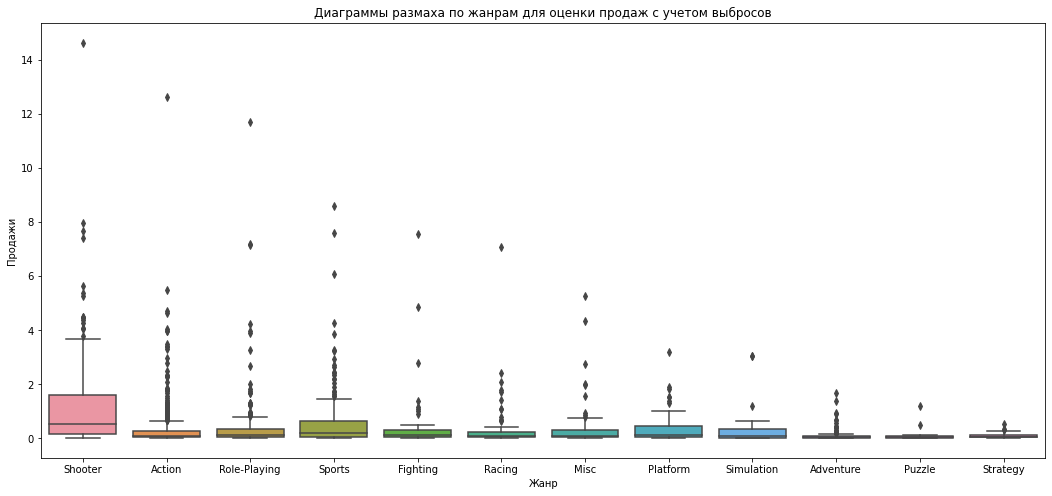

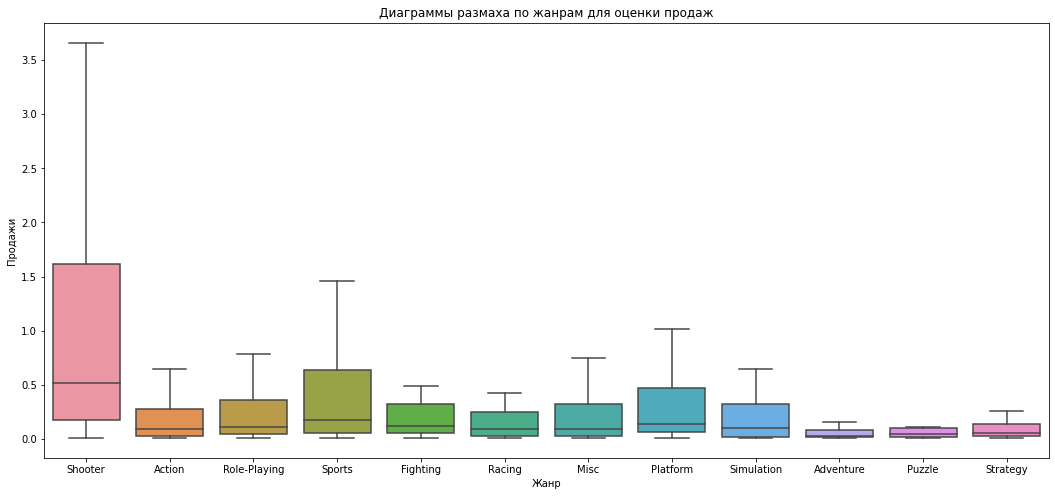

In [54]:
plt.figure(figsize=(18,8))
sns.boxplot(data=actual_df, x='genre', y='total_sales')
plt.title('Диаграммы размаха по жанрам для оценки продаж с учетом выбросов')
plt.xlabel('Жанр')
plt.ylabel('Продажи');

plt.figure(figsize=(18,8))
sns.boxplot(data=actual_df, x='genre', y='total_sales',showfliers = False )
plt.title('Диаграммы размаха по жанрам для оценки продаж')
plt.xlabel('Жанр')
plt.ylabel('Продажи');


Вывод

- Наибольшую долю на рынке занимает жанр Action с 199,36 млн проданных копий, этот жанр самый популярный и имеет 619 выпущенных релизов. Однако, если смотреть со стороны того, что нам нужен стабильный жанр, то нам подходит жанр Shooter, тк его медианные продажи самые большие. 
- Т.е. самым стабильным жанром является shooter, а самым нестабильным adventure
- Однако наибольшие продажи у жанра action
- Если мы планируем получить высокую прибыль, то нам нужен стабильный жанр, а значит, игра должна быть в жанре Shooter или Sprots. Хоть Action и имеет самые высокие продажи, но она нестабильна, тк как мы видим на 1 графике, у этого жанра большое количество выбросов.

# Общий вывод по исследовательскому анализу

- Количество выпускаемых игр начало расти с 2000 года, а самое большое количество игр было выпущено в 2008 - 2009 году, затем наблюдается снижение
- Наиболее популярными плафтормами игр стали PS2, X360, PS3, Wii
- Почти все платформы существуют 10 лет. При этом все платформы идут на снижение по уровню продаж. Потенциально прибыльной платформой я бы назвал ps4,тк с момента ее выпуска прошло не так много времени и продажи еще не упали до 0
- У всех платформ прослеживается взаимосвязь между продажами и оценками критиков, но оценки пользователей почти не оказывают влияние на продажи
- Наиболее популярными жанрами являюстя action, shooter и sprots. А наименее популярный жанр - puzzle

### Шаг 4. Портрет пользователя каждого региона

#### Определим для пользователя каждого региона самые популярные: платформы, жанр и влияение рейтинга ESRB на продажи

##### Топ 5 платформ

In [42]:
 def my_plot(index, region, name_of_index, region_name): #функция, котороя строит график для региона по искомому показателю
    actual_df.pivot_table(
    index = index, 
    values = region, 
    aggfunc = 'sum').sort_values(by = region, ascending = False).head(5).plot(
    kind = 'bar', 
    xlabel = name_of_index,
    ylabel = 'Продажи',
    title = 'Наиболее популярные {0} в {1}'.format(name_of_index, region_name),
    figsize=(15,5));

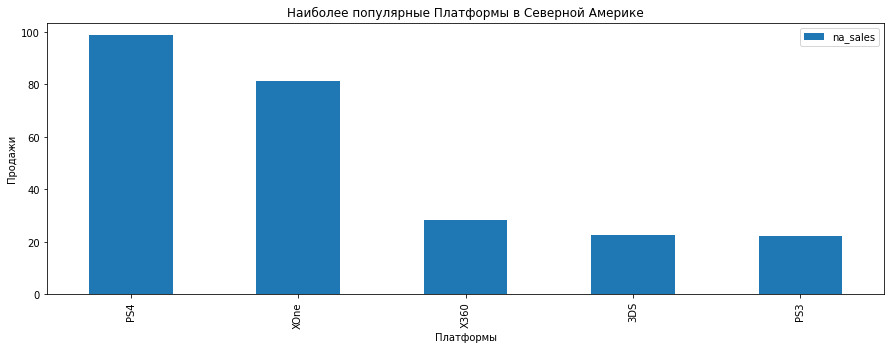

In [43]:
my_plot('platform', 'na_sales', 'Платформы', 'Северной Америке')

Как мы видим из графка 5 наиболее поплуярных платформ в америке это PS4, XOne, X360, 3DS, PS3, при этом PS4 - самая популярная платформа. 

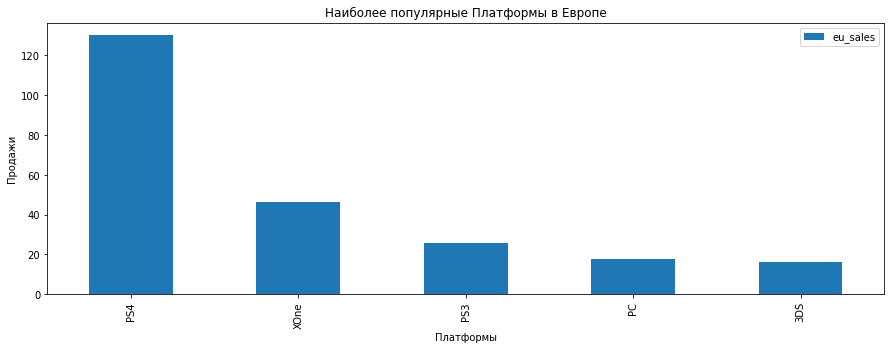

In [44]:
my_plot('platform', 'eu_sales', 'Платформы', 'Европе')

Первое место занимает PS4, при чем с большим отрывом, затем XOne и PS3, закрывают нашу 5-ку PC и 3DS

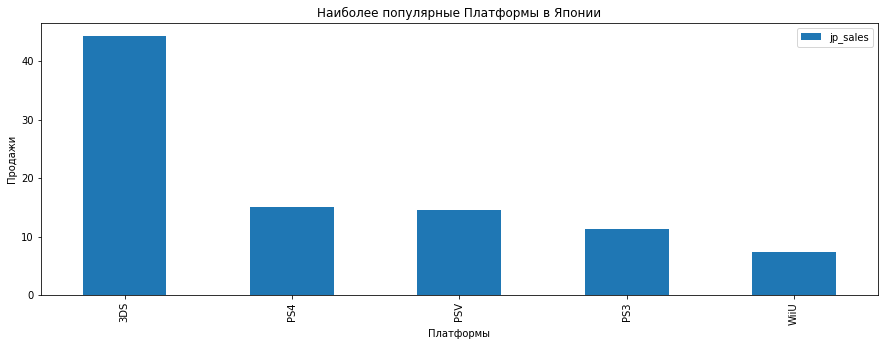

In [45]:
my_plot('platform', 'jp_sales', 'Платформы', 'Японии')


5 Самых популярных платформ в Японии это 3DS, PS4, PSV, PS3, WiU, при этом 3DS лидирует с большим отрывом. 

##### Топ 5 Жанров 

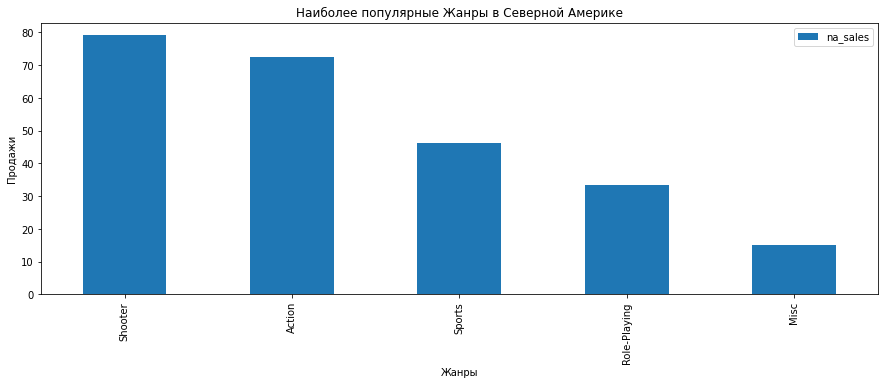

In [46]:
my_plot('genre', 'na_sales', 'Жанры', 'Северной Америке')

Видим, что 5 самых поплуряных жанров в СА - Shooter, Action, Sports, Role-play, Misc. Самым популярный жанр - Shooter. 

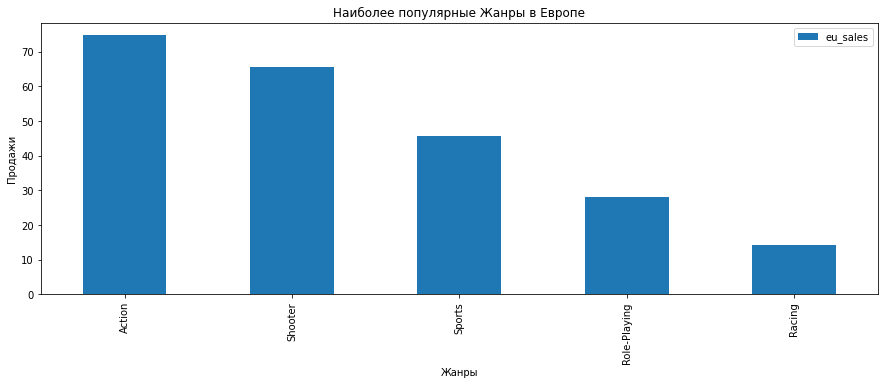

In [47]:
my_plot('genre', 'eu_sales', 'Жанры', 'Европе')

В Европе 5 самых популярных жанров это Action, Shooter, Sports, Role-play и Racing, а самый популярный - Action. 

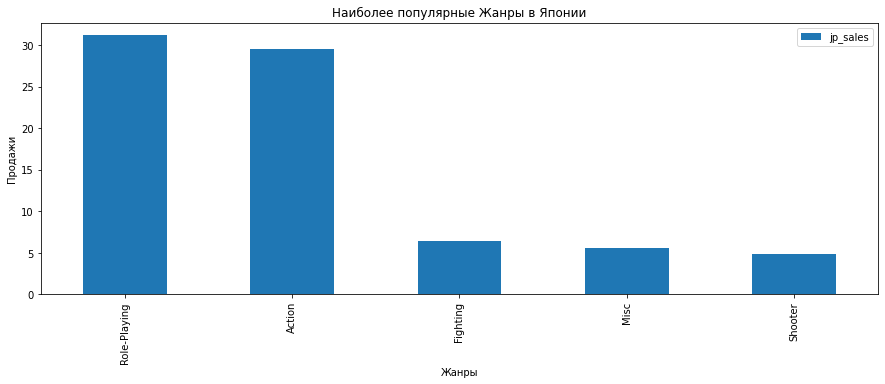

In [48]:
my_plot('genre', 'jp_sales', 'Жанры', 'Японии')

В Японии, в целом самыми популярными жанрами являются - RP, Action, Fighting, Misc, Shooter, самый популярный из них - RP. Также стоит отметить, что жанр Action ставновится популряным и возможно совсем скоро перегонит жанр RP по популярности.

##### Влияние рейтинга на продажи

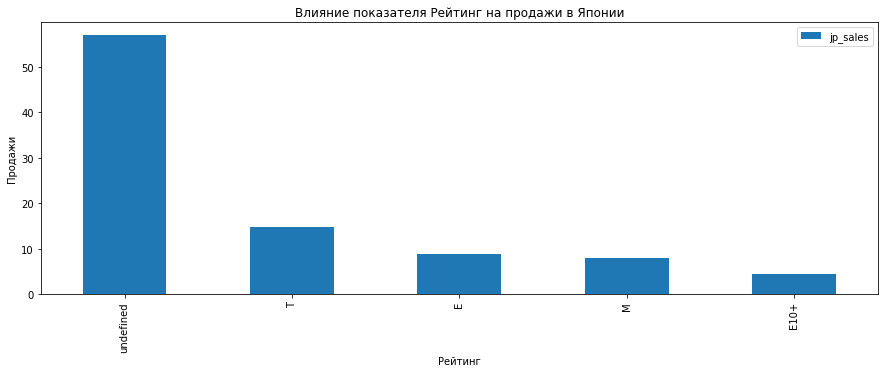

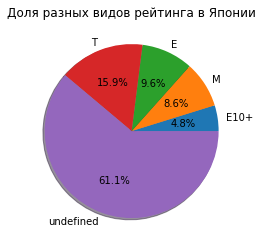

In [49]:
#Пришлось немного перепискать функцию, для корректного отображения названия графика
def my_rating(index, region, name_of_index, region_name): #функция, котороя строит график для региона по искомому показателю
    actual_df.pivot_table(
    index = index, 
    values = region, 
    aggfunc = 'sum').sort_values(by = region, ascending = False).head(5).plot(
    kind = 'bar', 
    xlabel = name_of_index,
    ylabel = 'Продажи',
    title = 'Влияние показателя {0} на продажи в {1}'.format(name_of_index, region_name),
    figsize=(15,5));
    
my_rating('rating', 'jp_sales', 'Рейтинг', 'Японии')
actual_df.pivot_table(
    index = 'rating', 
    values = 'jp_sales', 
    aggfunc = 'sum').sort_values(by = 'jp_sales').head(5).plot(
    kind = 'pie', 
    autopct='%1.1f%%', 
    subplots=True, 
    legend = False, 
    ylabel='',
    shadow = True)
plt.title('Доля разных видов рейтинга в Японии');

Как видим из графиков, в Японии рейтинг определенно влияет на уровень продаж. Так, игры с Рейтингом E или T, продаются намного лучше, чем игры с рейтингом E10+

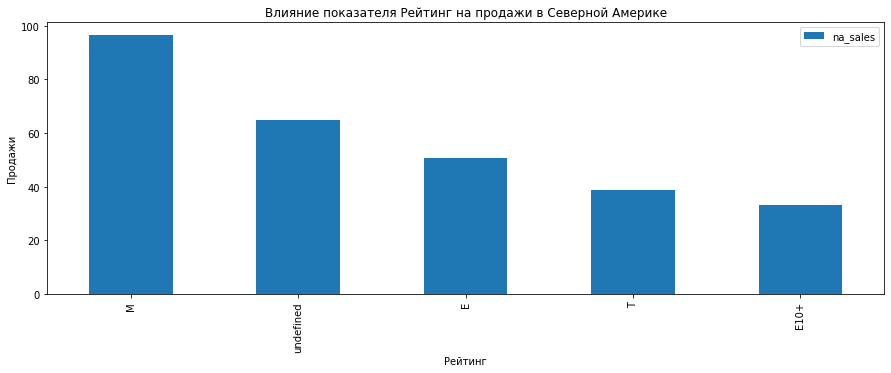

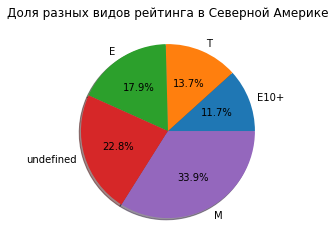

In [50]:
my_rating('rating', 'na_sales', 'Рейтинг', 'Северной Америке')
actual_df.pivot_table(
    index = 'rating', 
    values = 'na_sales', 
    aggfunc = 'sum').sort_values(by = 'na_sales').head(5).plot(
    kind = 'pie', 
    autopct='%1.1f%%', 
    subplots=True, 
    legend = False, 
    ylabel='',
    shadow = True)
plt.title('Доля разных видов рейтинга в Северной Америке');

В СА рейтинг тоже вляет на продажи, так, игры с рейтингом M или E продаются намного лучше, чем игры с рейтингом EC или E10+

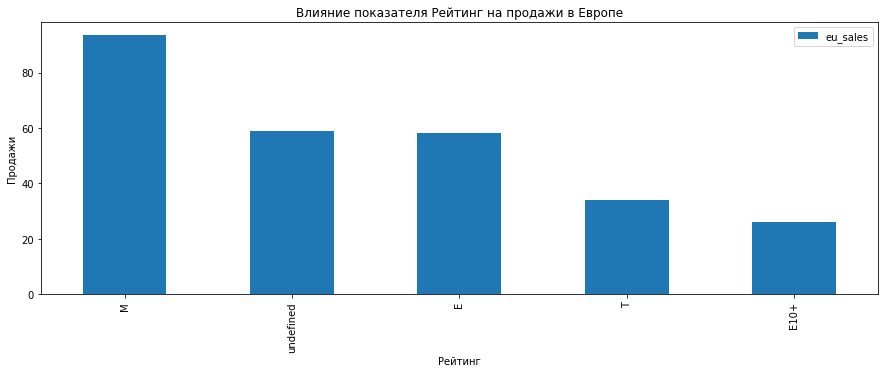

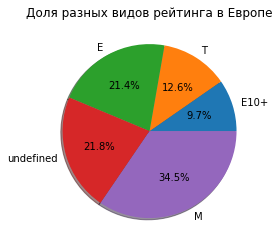

In [51]:
my_rating('rating', 'eu_sales', 'Рейтинг', 'Европе')
actual_df.pivot_table(
    index = 'rating', 
    values = 'eu_sales', 
    aggfunc = 'sum').sort_values(by = 'eu_sales').head(5).plot(
    kind = 'pie', 
    autopct='%1.1f%%', 
    subplots=True, 
    legend = False,
    ylabel='',
    shadow = True)
plt.title('Доля разных видов рейтинга в Европе');

И в Европе точно такая же ситуация, несомненно рейтинг оказывает влияние на уровень продаж. Игры с рейтингом M или E продаются лучше, чем игры с рейтингом E10+

# Вывод:

Разные платформы имеют разную популярность в разных регионах. Например, в Северной Америке и Европе, начиная с 2014 года стала популярна платформа PS4, однако в Японии первое место занимает 3DS.

Самые популярные жанры в Европе и СА практически полностью совпадают, тройку лидеров занимают Shooter, Action и Sports. В Японии же поплуярным жанрами явялются RP, Action и Fighting. В целом популярность жанров меняется не так сильно, как, например, популярность той или иной платформы.

Рейтинг оказывает влияние на продажи в каждом регионе, так, в Японии, будут хорошо продаваться игры с рейтнгом T или Е, в Европе - с рейтингом M или Е, в Америке также М или Е. Одинаково плохо будут продаваться игры с рейтингом  Е10+. 

В Японии первое место по рейтингу - "undefiend", это связано с тем ,что рейтинг ESRB ставится для игр из Америки и Канады.

### Шаг 5. Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


Н0 - Средние пользовательские рейтинги платформ XOne и PC равны 

Н1 - Средние пользовательские рейтинги платформ XOne и PC не равны

Нулевая гипотеза сформулирована исходя из задания, а альтернативная гипотеза - двусторонняя, так как не указано, что мы хотим узнать, больше рейтинги или меньше, значит подходит неравенство

In [54]:
print('Cредний пользовательский рейтинг платформы XOne: ', actual_df[actual_df['platform']=="XOne"]['user_score'].dropna().mean())
print('Cредний пользовательский рейтинг платформы PC: ', actual_df[actual_df['platform']=="PC"]['user_score'].dropna().mean())


Cредний пользовательский рейтинг платформы XOne:  6.594545454545456
Cредний пользовательский рейтинг платформы PC:  6.298360655737705


In [55]:
alpha = .05
result = st.ttest_ind(
    actual_df[actual_df['platform']=="XOne"]['user_score'].dropna(),
    actual_df[actual_df['platform']=="PC"]['user_score'].dropna())

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


# Вывод
Не получилось отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ XOne и PC одинаковые. 
Думаю сами по себе рейтинги то отличаются, но различие настолько незначительно, что гипотезу мы отвергаем.

#### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Н0 - Средние пользовательские рейтинги жанров Action и Sports равны

Н1 - Средние пользовательские рейтинги жанров Action и Sports не равны

Нулевая гипотеза сформулирована исходя из задания, а альтернативная гипотеза - двусторонняя, так как не указано, что мы хотим узнать, больше рейтинги или меньше, значит подходит неравенство

In [56]:
print('Cредний пользовательский рейтинг жанра Action: ', actual_df.loc[actual_df['genre'] == 'Action', 'user_score'].dropna().mean())
print('Cредний пользовательский рейтинг жанра Sports: ', actual_df.loc[actual_df['genre'] == 'Sports', 'user_score'].dropna().mean())

Cредний пользовательский рейтинг жанра Action:  6.760606060606061
Cредний пользовательский рейтинг жанра Sports:  5.2251968503937


In [57]:
alpha = .05
result1 = st.ttest_ind(
    actual_df.loc[actual_df['genre'] == 'Action', 'user_score'].dropna(),
    actual_df.loc[actual_df['genre'] == 'Sports', 'user_score'].dropna(),
)

print(result1.pvalue)

if result1.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую минуту')

2.8711147985105864e-19
Отвергаем нулевую гипотезу


# Вывод
Отвергли нулевую гипотезу о том, что средние пользователские рейтинги двух жанров равны. Значит средние пользовательские рейтинги различаются, либо в большую, либо в меньшую сторону.

# Какой критерий применили для проверки гипотез и почему.
ttest_ind используется в обоих случаях, тк у нас 2 независимые выборки и мы проверяем гипотезу о равенстве средних двух генеральных совокупностей

### Шаг 6. Общий вывод

Перед проведением анализа мы подготовили данные, избавились от некоторых пропущенных значений, привели названия столбцов к правильному стилю, изменили типы данных в столбцах, где это было необходимо, а также посчитали общие продажи по всем регионам и вынесли это значение в отдельный столбец.

В ходе исследовательского анализа, мы определили, что был плавный рост выпуска игр с 1980 по 2008 год, а затем последовало резкое снижение. Самое большое количество игр было выпщуено в 2008-2009 года. Также мы определили, что самыми продаваемыми платформами являются PS2, PS3 и X360, а среднее время жизни одной платформы составляет 10 лет. Также мы отметили, что начиная с 2013 года большую популярность приобрела платформа PS4. У всех платформ прослеживается взаимосвязь между продажами и оценками критиков, но оценки пользователей почти не оказывают влияние на продажи.
Наиболее популярными жанрами являюстя action, shooter и sports. А наименее популярный жанр - puzzle.

Также мы составили портрет пользователей каждого региона. Из которого мы определили, что в Северной Америке и Европе, начиная с 2014 года стала популярна платформа PS4, однако в Японии первое место все также занимает Wii, неизменная с начала 2008 года. Если рассматривать популярность платформ в целом, а не только за акутуальный период, то в Европе и Америке первые места занимают либо X360, либо PS3, а в Японии безизменно Wii, однако PS3, тоже несомненно популярна.

Самые популярные жанры в Европе и СА практически полностью совпадают, тройку лидеров занимают Shooter, Action и Sports. В Японии же поплуярным жанрами явялются RP, Action и Fighting. В целом популярность жанров меняется не так сильно, как, например, популярность той или иной платформы.

Рейтинг оказывает влияние на продажи в каждом регионе, так, в Японии, будут хорошо продаваться игры с рейтнгом T или Е, в Европе - с рейтингом M или Е, в Америке также М или Е. Одинаково плохо во всех регионах будут продаваться игры с рейтингом Е10+.

Также мы проверили 2 гипотезы: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые и Средние пользовательские рейтинги жанров Action и Sports разные. Первую мы отвергнуть не смогли, а в результате проверки второй выяснили, что пользовательские рейтинги 2 жанров различаются в большую или меньшую сторону.

Для успешной рекламной компании нам необходимо:
- Запустить рекламу для игр на платформах PS4 или XOne, тк это самые популярные платформы с наибольшей перспективой. 
- Жанром стоит выбрать shooter, тк это самый стабильный жанр, можно рискнуть и попробовать жанр Action, но стоит помнить, что он не такой стабильный, хотя обладает самыми выскоими продажами. 
- Лучшим рейтингом ESRB будет M или E, тк он занимает 1/2 места во всех 3 регионах, а также игры, для которых не определен рейтинг ESRB. 
- А лучший регион для рекламы будет Европа или Америка, тк 2 этих региона схожи практически во всем, они заинтересованы в одинаковых жанрах и одинаковых платформах. Если руководствоваться общими данными, то лучше всего рекламу запускать в Европе, тк там население больше, чем в Америке, а значит рекламу увидит больше людей, а это большее количество потенцаильных клиентов.
- Стоит обращать внимание только на отзывы критиков, потому что во всех регионах этот показатель оказывает влияние уровень продаж, что нельзя сказать про отзывы пользователей.
